In [33]:
#Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import pathlib as Path

# Study data files
melanomaData = pd.read_csv("Data/Melanoma Cancer Statistics, 1999-2019 Incidence.csv")
stateData = pd.read_csv("Data/model_state.csv")
stateYearData = pd.read_csv("Data/climdiv_state_year.csv")
latlongData = pd.read_csv("Data/world_country_and_usa_states_latitude_and_longitude_values.csv")

# Merge the weather data into one DataFrame
weatherData = pd.merge(stateData, stateYearData, how = "left", on = ["fips"])
weatherlatlong = pd.merge(weatherData, latlongData, how = "left", on = ["State", "State Code"])

#Take the state code out of the Melanoma data
melanomaData = melanomaData.drop(columns=['State Code', 'Year Code'])

In [88]:
#Take out the uneeded columns, create a new weather data frame
cleanWeather = weatherlatlong.drop(columns=["Fall","Spring","index_x","Summer","Winter","max_warming_season","country_code","country", "STATENS", "index_y", "latitude","longitude", 'fips'])
cleanWeather = cleanWeather.loc[cleanWeather["year"]>1998].rename(columns={"year":"Year"})

In [91]:
cleanWeather.head()

,Annual,State Code,State,Year,temp,tempc,usa_state_latitude,usa_state_longitude
104,-0.035048,AL,Alabama,1999,64.141667,17.856481,32.318231,-86.902298
105,-0.035048,AL,Alabama,2000,63.566667,17.537037,32.318231,-86.902298
106,-0.035048,AL,Alabama,2001,63.033333,17.240741,32.318231,-86.902298
107,-0.035048,AL,Alabama,2002,63.575000,17.541667,32.318231,-86.902298
108,-0.035048,AL,Alabama,2003,62.733333,17.074074,32.318231,-86.902298


In [92]:
#Merge the Melanoma Data with the weather data
# We want to get the incidence of Melanoma by location
melanomaWeather = pd.merge(melanomaData, cleanWeather, how = "left", on = ["State", "Year"])

In [93]:
melanomaWeather.head()  #DELETE

,Notes,Cancer Sites,Cancer Sites Code,Sex,Sex Code,Year,Region,Region Code,State,Count,Annual,State Code,temp,tempc,usa_state_latitude,usa_state_longitude
0,NaN,Melanoma of the Skin,25010,Female,F,1999,Northeast,CENS-R1,Connecticut,326,1.801492,CT,50.850000,10.472222,41.603221,-73.087749
1,NaN,Melanoma of the Skin,25010,Female,F,1999,Northeast,CENS-R1,Maine,122,1.744621,ME,43.800000,6.555556,45.253783,-69.445469
2,NaN,Melanoma of the Skin,25010,Female,F,1999,Northeast,CENS-R1,Massachusetts,498,1.700653,MA,49.783333,9.879630,42.407211,-71.382437
3,NaN,Melanoma of the Skin,25010,Female,F,1999,Northeast,CENS-R1,New Hampshire,124,1.622430,NH,45.391667,7.439815,43.193852,-71.572395
4,NaN,Melanoma of the Skin,25010,Female,F,1999,Northeast,CENS-R1,Rhode Island,81,2.038868,RI,51.750000,10.972222,41.580095,-71.477429


In [52]:
#Clean up the DataFrame combining the Melanoma data and weather data in a new DataFrame
cleanMelanomaWeather = melanomaWeather.drop(columns=['Notes','Region','fips','Region Code','Sex Code']).dropna()

In [78]:
cleanMelanomaWeather.head()

,Cancer Sites,Cancer Sites Code,Sex,Year,State,Count,Annual,State Code,temp,tempc,usa_state_latitude,usa_state_longitude
0,Melanoma of the Skin,25010,Female,1999,Connecticut,326,1.801492,CT,50.850000,10.472222,41.603221,-73.087749
1,Melanoma of the Skin,25010,Female,1999,Maine,122,1.744621,ME,43.800000,6.555556,45.253783,-69.445469
2,Melanoma of the Skin,25010,Female,1999,Massachusetts,498,1.700653,MA,49.783333,9.879630,42.407211,-71.382437
3,Melanoma of the Skin,25010,Female,1999,New Hampshire,124,1.622430,NH,45.391667,7.439815,43.193852,-71.572395
4,Melanoma of the Skin,25010,Female,1999,Rhode Island,81,2.038868,RI,51.750000,10.972222,41.580095,-71.477429


In [54]:
#Group by the state   #DELETE?

In [55]:
#Find the results for 1999
melanoma1999 = cleanMelanomaWeather.loc[cleanMelanomaWeather["Year"]==1999]

In [59]:
melanoma1999.groupby('State').mean()#[:]  #DELETE

/var/folders/24/hvyfpl3j34q01pwchrb67tj80000gp/T/ipykernel_8931/3614901042.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  melanoma1999.groupby('State').mean()#[:]


,Cancer Sites Code,Year,Count,Annual,temp,tempc,usa_state_latitude,usa_state_longitude
State,,,,,,,,
Alabama,25010.0,1999.0,302.5,-0.035048,64.141667,17.856481,32.318231,-86.902298
Arizona,25010.0,1999.0,459.0,1.319880,60.783333,15.990741,34.048928,-111.093731
Arkansas,25010.0,1999.0,155.5,0.214074,62.150000,16.750000,35.201050,-91.831833
California,25010.0,1999.0,2786.0,1.480561,57.958333,14.421296,36.778261,-119.417932
Colorado,25010.0,1999.0,400.0,1.438589,46.641667,8.134259,39.550051,-105.782067
Connecticut,25010.0,1999.0,381.0,1.801492,50.850000,10.472222,41.603221,-73.087749
Delaware,25010.0,1999.0,52.0,1.661683,56.508333,13.615741,38.910832,-75.527670
Florida,25010.0,1999.0,1622.5,1.034878,71.166667,21.759259,27.664827,-81.515754
Georgia,25010.0,1999.0,497.0,0.384049,64.491667,18.050926,32.157435,-82.907123


y = -1.5x + 112.48
Correlation Coefficient is -0.9486178940065155
R-squared is 0.8998759088293568


/var/folders/24/hvyfpl3j34q01pwchrb67tj80000gp/T/ipykernel_8931/2554176178.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  averages1999 = melanoma1999.groupby('State').mean()


Text(0.5, 1.0, 'Temperatures by USA Latitudes')

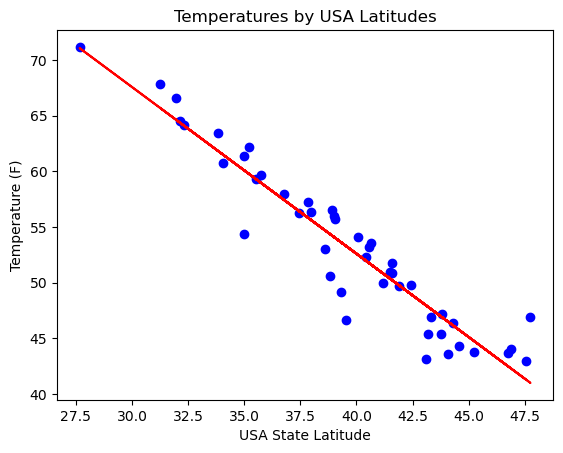

In [74]:
#Create a scatter plot of the Latidude versus the Temperature
averages1999 = melanoma1999.groupby('State').mean()

x, y = averages1999["usa_state_latitude"], averages1999["temp"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
regress = x * slope + intercept
line = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line)
r = np.corrcoef(x, y)
rSquared = r*r
print("Correlation Coefficient is " + str(r[0][1]))
print("R-squared is " + str(rSquared[0][1]))


fig1, ax1 = plt.subplots()
markersize = 5

plt.scatter(x, y, color = "blue")
plt.plot(x,regress,"r-")

plt.ylabel("Temperature (F)")
plt.xlabel("USA State Latitude")
plt.title('Temperatures by USA Latitudes IN 1999')

y = -25.99x + 1472.06
Correlation Coefficient is -0.25579963641022196
R-squared is 0.06543345398760175


Text(0.5, 1.0, 'Incidences of Melanoma by USA Latitudes')

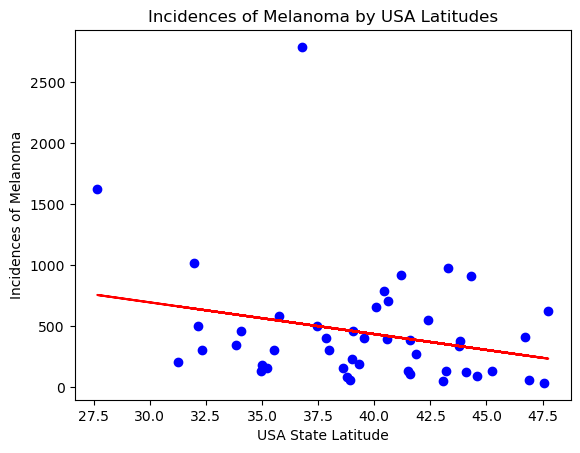

In [76]:
#Create a scatter plot of the Latidude versus the incidence of Melanoma
x1, y1 = averages1999["usa_state_latitude"], averages1999["Count"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x1, y1)
regress = x1 * slope + intercept
line = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line)
r = np.corrcoef(x1, y1)
rSquared = r*r
print("Correlation Coefficient is " + str(r[0][1]))
print("R-squared is " + str(rSquared[0][1]))

fig2, ax2 = plt.subplots()
markersize = 5

plt.scatter(x1, y1, color = "blue")
plt.plot(x1,regress,"r-")

plt.ylabel("Incidences of Melanoma")
plt.xlabel("USA State Latitude")
plt.title('Incidences of Melanoma by USA Latitudes in 1999')

In [79]:
#Find the results for 2019
melanoma2019 = cleanMelanomaWeather.loc[cleanMelanomaWeather["Year"]==2019]

y = -1.77x + 122.29
Correlation Coefficient is -0.9536194619422884
R-squared is 0.9093900781950996


/var/folders/24/hvyfpl3j34q01pwchrb67tj80000gp/T/ipykernel_8931/1288420359.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  averages2019 = melanoma2019.groupby('State').mean()


Text(0.5, 1.0, 'Temperatures by USA Latitudes in 2019')

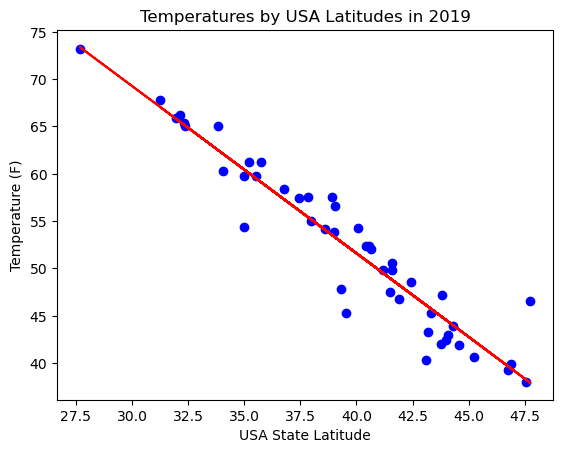

In [80]:
#Create a scatter plot of the Latidude versus the Temperature
averages2019 = melanoma2019.groupby('State').mean()

x, y = averages2019["usa_state_latitude"], averages2019["temp"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
regress = x * slope + intercept
line = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line)
r = np.corrcoef(x, y)
rSquared = r*r
print("Correlation Coefficient is " + str(r[0][1]))
print("R-squared is " + str(rSquared[0][1]))


fig1, ax1 = plt.subplots()
markersize = 5

plt.scatter(x, y, color = "blue")
plt.plot(x,regress,"r-")

plt.ylabel("Temperature (F)")
plt.xlabel("USA State Latitude")
plt.title('Temperatures by USA Latitudes in 2019')

y = -64.84x + 3491.09
Correlation Coefficient is -0.3256846971959199
R-squared is 0.10607052198759805


Text(0.5, 1.0, 'Incidences of Melanoma by USA Latitudes in 2019')

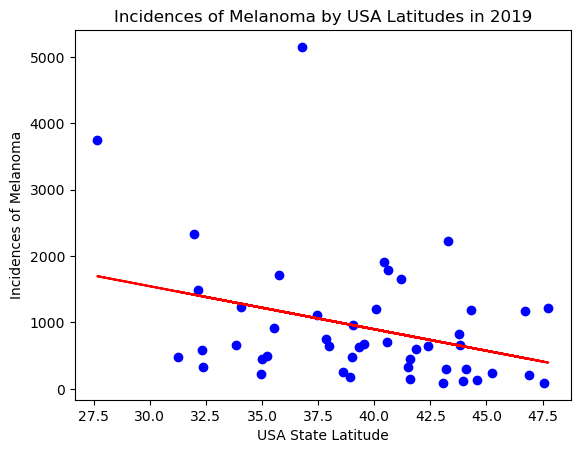

In [81]:
#Create a scatter plot of the Latidude versus the incidence of Melanoma
x1, y1 = averages2019["usa_state_latitude"], averages2019["Count"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x1, y1)
regress = x1 * slope + intercept
line = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line)
r = np.corrcoef(x1, y1)
rSquared = r*r
print("Correlation Coefficient is " + str(r[0][1]))
print("R-squared is " + str(rSquared[0][1]))

fig2, ax2 = plt.subplots()
markersize = 5

plt.scatter(x1, y1, color = "blue")
plt.plot(x1,regress,"r-")

plt.ylabel("Incidences of Melanoma")
plt.xlabel("USA State Latitude")
plt.title('Incidences of Melanoma by USA Latitudes in 2019')

In [86]:
clean1999 = averages1999.drop(columns= ["Cancer Sites Code",'Year','Annual','temp','tempc','usa_state_longitude'])
clean2019 = averages2019.drop(columns= ["Cancer Sites Code",'Year','Annual','temp','tempc','usa_state_longitude'])

In [87]:
#TRYING T-TEST --- INDEPENDENT
st.ttest_ind(clean1999, clean2019, equal_var=False)
#Null hypothesis: The means for the two populations are equal. Alternative hypothesis: The means for the two populations are not equal.
#A statistically significant test result (P ≤ 0.05) means that the test hypothesis is false or should be rejected.
#If your p-value is less than or equal to 0.05 (the significance level), you would conclude that your result is statistically significant. This means the evidence is strong enough to reject the null hypothesis in favor of the alternative hypothesis.

#SINCE THE P-VALUE FOR THE INCIDENCES OF MELANOMA IS <= 0.05 WE CAN REJECT THAT 1999 AND 2019 HAVE THE SAME 
#NUMBER OF INCIDENCES OF MELANOMA

Ttest_indResult(statistic=array([-3.10501046,  0.04365048]), pvalue=array([0.00277553, 0.96527865]))

In [ ]:
#CONCLUDE THAT THERE IS LIKELY AN INCREASE IN MELANOMA INCIDENCE BETWEEN 1999 AND 2019, BUT WE DO NOT HAVE THE 
#DATA TO SUPPORT THAT THIS IS DUE TO LATITUDE

In [95]:


##DELEETE DELTE DELETE
clean1999

,Count,usa_state_latitude
State,,
Alabama,302.5,32.318231
Arizona,459.0,34.048928
Arkansas,155.5,35.201050
California,2786.0,36.778261
Colorado,400.0,39.550051
Connecticut,381.0,41.603221
Delaware,52.0,38.910832
Florida,1622.5,27.664827
Georgia,497.0,32.157435


In [71]:
melanomaData.head()  #DELETE

,Notes,Cancer Sites,Cancer Sites Code,Sex,Sex Code,Year,Region,Region Code,State,Count
0,NaN,Melanoma of the Skin,25010,Female,F,1999,Northeast,CENS-R1,Connecticut,326
1,NaN,Melanoma of the Skin,25010,Female,F,1999,Northeast,CENS-R1,Maine,122
2,NaN,Melanoma of the Skin,25010,Female,F,1999,Northeast,CENS-R1,Massachusetts,498
3,NaN,Melanoma of the Skin,25010,Female,F,1999,Northeast,CENS-R1,New Hampshire,124
4,NaN,Melanoma of the Skin,25010,Female,F,1999,Northeast,CENS-R1,Rhode Island,81


In [3]:
latlongData.head()  #DELETE

,country_code,latitude,longitude,country,State Code,usa_state_latitude,usa_state_longitude,State
0,AD,42.546245,1.601554,Andorra,AK,63.588753,-154.493062,Alaska
1,AE,23.424076,53.847818,United Arab Emirates,AL,32.318231,-86.902298,Alabama
2,AF,33.939110,67.709953,Afghanistan,AR,35.201050,-91.831833,Arkansas
3,AG,17.060816,-61.796428,Antigua and Barbuda,AZ,34.048928,-111.093731,Arizona
4,AI,18.220554,-63.068615,Anguilla,CA,36.778261,-119.417932,California


In [6]:
#stateYearData.head()
stateData.head()
#weatherData.head()    #DELETE #DELETE #DELETE #DELETE

,index,fips,Fall,Spring,Summer,Winter,max_warming_season,Annual,STUSAB,STATE_NAME,STATENS
0,0,1,-0.195668,-0.105862,-0.325009,0.458526,Winter,-0.035048,AL,Alabama,1779775
1,1,4,1.203951,1.384480,1.274455,1.388388,Winter,1.319880,AZ,Arizona,1779777
2,2,5,-0.042540,0.266399,0.058596,0.532247,Winter,0.214074,AR,Arkansas,68085
3,3,6,1.570921,1.449242,1.478335,1.412430,Fall,1.480561,CA,California,1779778
4,4,8,1.055309,1.436910,1.367845,1.838758,Winter,1.438589,CO,Colorado,1779779


In [4]:
weatherlatlong.head() #DELETE #DELETE #DELETE

,index_x,fips,Fall,Spring,Summer,Winter,max_warming_season,Annual,State Code,State,...,index_y,year,temp,tempc,country_code,latitude,longitude,country,usa_state_latitude,usa_state_longitude
0,0,1,-0.195668,-0.105862,-0.325009,0.458526,Winter,-0.035048,AL,Alabama,...,0,1895,61.641667,16.467593,AE,23.424076,53.847818,United Arab Emirates,32.318231,-86.902298
1,0,1,-0.195668,-0.105862,-0.325009,0.458526,Winter,-0.035048,AL,Alabama,...,1,1896,64.266667,17.925926,AE,23.424076,53.847818,United Arab Emirates,32.318231,-86.902298
2,0,1,-0.195668,-0.105862,-0.325009,0.458526,Winter,-0.035048,AL,Alabama,...,2,1897,64.191667,17.884259,AE,23.424076,53.847818,United Arab Emirates,32.318231,-86.902298
3,0,1,-0.195668,-0.105862,-0.325009,0.458526,Winter,-0.035048,AL,Alabama,...,3,1898,62.983333,17.212963,AE,23.424076,53.847818,United Arab Emirates,32.318231,-86.902298
4,0,1,-0.195668,-0.105862,-0.325009,0.458526,Winter,-0.035048,AL,Alabama,...,4,1899,63.100000,17.277778,AE,23.424076,53.847818,United Arab Emirates,32.318231,-86.902298


In [25]:
states = melanomaData.groupby("State")["Count"].mean()
states #DELETE #DELETE #DELETE

State
Alabama                  498.000000
Alaska                    41.000000
Arizona                  720.714286
Arkansas                 278.071429
California              3914.928571
Colorado                 547.619048
Connecticut              445.047619
Delaware                 132.619048
District of Columbia      29.307692
Florida                 2645.880952
Georgia                 1075.952381
Hawaii                   156.571429
Idaho                    202.214286
Illinois                1184.452381
Indiana                  640.928571
Iowa                     393.476190
Kansas                   346.666667
Kentucky                 564.976190
Louisiana                350.357143
Maine                    190.476190
Maryland                 664.976190
Massachusetts            787.833333
Michigan                1046.404762
Minnesota                741.428571
Mississippi              266.294118
Missouri                 555.476190
Montana                  131.023810
Nebraska              

In [26]:
years = melanomaData.groupby("Year")["State"]
years #DELETE #DELETE #DELETE

In [27]:
 #DELETE #DELETE #DELETE #DELETE #DELETEweatherData.head() #DELETE #DELETE #DELETE #DELETE

,index_x,fips,Fall,Spring,Summer,Winter,max_warming_season,Annual,STUSAB,STATE_NAME,STATENS,index_y,year,temp,tempc
0,0,1,-0.195668,-0.105862,-0.325009,0.458526,Winter,-0.035048,AL,Alabama,1779775,0,1895,61.641667,16.467593
1,0,1,-0.195668,-0.105862,-0.325009,0.458526,Winter,-0.035048,AL,Alabama,1779775,1,1896,64.266667,17.925926
2,0,1,-0.195668,-0.105862,-0.325009,0.458526,Winter,-0.035048,AL,Alabama,1779775,2,1897,64.191667,17.884259
3,0,1,-0.195668,-0.105862,-0.325009,0.458526,Winter,-0.035048,AL,Alabama,1779775,3,1898,62.983333,17.212963
4,0,1,-0.195668,-0.105862,-0.325009,0.458526,Winter,-0.035048,AL,Alabama,1779775,4,1899,63.100000,17.277778
